# Reinforcement Learning - Deep Q Network

In [1]:
import random
import torch
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys

assert sys.version_info[:3] >= (3, 6, 0), "Make sure you have Python 3.6 installed!"

In [3]:
import gym

In [4]:
from project.networks import SARSANetwork, DeepQNetwork
from project.policies import EpsilonGreedyPolicy

from project.train_network import train_episodes
from project.test_network import test_episodes

In [5]:
def set_seeds(seed):
    random.seed(seed)
    torch.manual_seed(seed)
    np.random.seed(seed)
    env.seed(seed)

In [6]:
def smooth(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0))
    return (cumsum[N:] - cumsum[:-N]) / float(N)

def plot_duration_loss_graph(durations, losses):
    fig, axes = plt.subplots(nrows=1, ncols=2)
    axes[0].plot(smooth(episode_durations, 10))
    axes[0].set_title('Episode durations per episode')
    axes[1].plot(smooth(losses, 10))
    axes[1].set_title('Gradient loss per episode')
    fig.tight_layout()
    plt.show()

def plot_duration_reward_graph(durations, rewards):
    fig, axes = plt.subplots(nrows=1, ncols=2)
    axes[0].plot(smooth(episode_durations, 10))
    axes[0].set_title('Episode durations per episode')
    axes[1].plot(smooth(rewards, 10))
    axes[1].set_title('Reward per episode')
    fig.tight_layout()
    plt.show()

## 1. Load Environment

In [7]:
env = gym.envs.make("CartPole-v1")
action_space = env.action_space.n

## 2. Deep Q-Network (DQN)

### Training

 Episode 0 finished after 29 steps
 Episode 10 finished after 11 steps
 Episode 20 finished after 15 steps
 Episode 30 finished after 32 steps
 Episode 40 finished after 13 steps
 Episode 50 finished after 34 steps
 Episode 60 finished after 69 steps
 Episode 70 finished after 69 steps
 Episode 80 finished after 79 steps
 Episode 90 finished after 92 steps
 Episode 100 finished after 79 steps
 Episode 110 finished after 91 steps
 Episode 120 finished after 203 steps
 Episode 130 finished after 201 steps
 Episode 140 finished after 174 steps
 Episode 150 finished after 244 steps
 Episode 160 finished after 189 steps
 Episode 170 finished after 156 steps
 Episode 180 finished after 239 steps
 Episode 190 finished after 81 steps


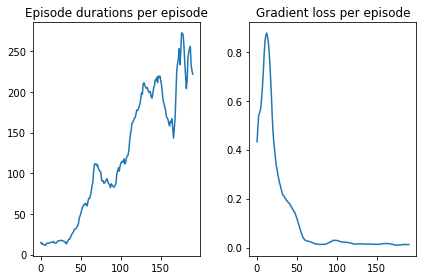

In [8]:
num_episodes = 200
batch_size = 64
discount_factor = 0.8
learn_rate = 1e-3
num_hidden = 128
semi_grad = True
use_replay = True
seed = 42

# We will seed the algorithm (before initializing QNetwork!) for reproducibility
set_seeds(seed)

dq_network = DeepQNetwork(in_features=4, num_hidden=num_hidden, out_features=action_space, discount_factor=discount_factor)
dq_policy = EpsilonGreedyPolicy(dq_network)
episode_durations, losses = train_episodes(env, dq_policy, num_episodes, batch_size, learn_rate, semi_grad=semi_grad, use_replay=use_replay)

plot_duration_loss_graph(episode_durations, losses)

### Testing

 Episode 0 finished after 206 steps obtaining 206.0 reward
 Episode 10 finished after 193 steps obtaining 193.0 reward
 Episode 20 finished after 158 steps obtaining 158.0 reward
 Episode 30 finished after 316 steps obtaining 316.0 reward
 Episode 40 finished after 153 steps obtaining 153.0 reward
 Episode 50 finished after 205 steps obtaining 205.0 reward
 Episode 60 finished after 256 steps obtaining 256.0 reward
 Episode 70 finished after 370 steps obtaining 370.0 reward
 Episode 80 finished after 281 steps obtaining 281.0 reward
 Episode 90 finished after 220 steps obtaining 220.0 reward


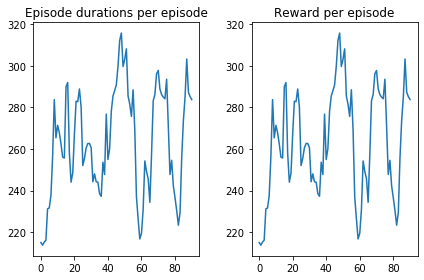

In [9]:
num_episodes = 100
seed = 46

# We will seed the algorithm (before initializing QNetwork!) for reproducibility
set_seeds(seed)

episode_durations, episode_rewards = test_episodes(env, dq_policy, num_episodes)

plot_duration_reward_graph(episode_durations, episode_rewards)

## 3. Deep SARSA-Network (DQN)

### Training

 Episode 0 finished after 29 steps
 Episode 10 finished after 10 steps
 Episode 20 finished after 10 steps
 Episode 30 finished after 15 steps
 Episode 40 finished after 67 steps
 Episode 50 finished after 149 steps
 Episode 60 finished after 150 steps
 Episode 70 finished after 117 steps
 Episode 80 finished after 115 steps
 Episode 90 finished after 116 steps
 Episode 100 finished after 122 steps
 Episode 110 finished after 11 steps
 Episode 120 finished after 153 steps
 Episode 130 finished after 362 steps
 Episode 140 finished after 285 steps
 Episode 150 finished after 218 steps
 Episode 160 finished after 232 steps
 Episode 170 finished after 205 steps
 Episode 180 finished after 194 steps
 Episode 190 finished after 219 steps


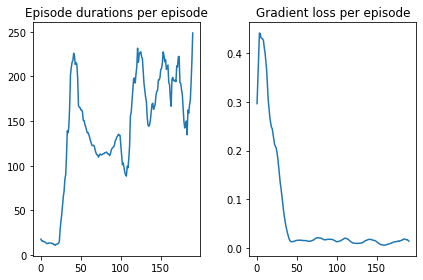

In [10]:
num_episodes = 200
batch_size = 64
discount_factor = 0.8
learn_rate = 1e-3
num_hidden = 128
semi_grad = True
use_replay = True
seed = 42  # This is not randomly chosen

# We will seed the algorithm (before initializing QNetwork!) for reproducibility
set_seeds(seed)

sarsa_network = SARSANetwork(in_features=4, num_hidden=num_hidden, out_features=action_space, discount_factor=discount_factor)
sarsa_policy = EpsilonGreedyPolicy(sarsa_network)
episode_durations, losses = train_episodes(env, sarsa_policy, num_episodes, batch_size, learn_rate, semi_grad=semi_grad, use_replay=use_replay)

plot_duration_loss_graph(episode_durations, losses)

### Testing

 Episode 0 finished after 160 steps obtaining 160.0 reward
 Episode 10 finished after 184 steps obtaining 184.0 reward
 Episode 20 finished after 169 steps obtaining 169.0 reward
 Episode 30 finished after 155 steps obtaining 155.0 reward
 Episode 40 finished after 179 steps obtaining 179.0 reward
 Episode 50 finished after 193 steps obtaining 193.0 reward
 Episode 60 finished after 183 steps obtaining 183.0 reward
 Episode 70 finished after 160 steps obtaining 160.0 reward
 Episode 80 finished after 154 steps obtaining 154.0 reward
 Episode 90 finished after 184 steps obtaining 184.0 reward


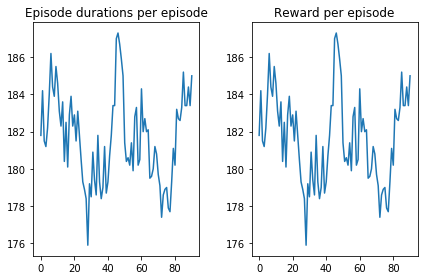

In [11]:
num_episodes = 100
seed = 43

# We will seed the algorithm (before initializing QNetwork!) for reproducibility
set_seeds(seed)

episode_durations, episode_rewards = test_episodes(env, sarsa_policy, num_episodes)

plot_duration_reward_graph(episode_durations, episode_rewards)